# Lab 2 - September 9, 2022

## Starting a new piece of code!

It's important that your code is clean, replicable, and readable by you and others. At the top of a notebook, we should always write a few comments about who wrote the script, when they did it, and why. It's also important to clean your workspace up. You should restart your notebook kernel before you run your script from the beginning, and especially if you're debugging some functionality. Your results should be reproducable from a completely blank starting point, otherwise you might have one result one day, and a different one the next day. Yikes!


In [23]:
# This is the file for MathTools lab #1. 
# Materials adapted over the years by Math Tools TA and instructors. 
# The previous iteration of this tutorial was authored/updated 
# by Marissa Fassold, Jordan Lei,
# and Srinidhi Venkatesan Kalavai for Math Tools 2022, 
# then adapted by Sarah Master, Ajay Subramanian, & Eero Simoncelli 
# for Math Tools 2023. 

## Importing Data
Before you can import data, it has to be in a location that Jupyter notebook can find it. You can ensure that this is the case either by making sure the data is in Jupyter's file path, or by specifying a path to the file when you load it.

Most well-organized directories of code do not have data sitting in the same directory as everything else. In fact, code directories should more or less be organized the same way you might organize a regular folder of files. The more readable/user-friendly, the better! In this case, we have a main home directory (where you are now), and a "data" directory.

First, let's start by making sure our directory for data exists, and look at what's in it. We are going to be working with a file called "data.mat," so let's make sure it's sitting in our data directory.

To see what folders have already been added to the path, you can try the following. This will show you the directories that Jupyter searches through to find files.

In [26]:
import sys
sys.path

['/home/59880a44-56a6-4ecb-83b0-df81e4dff1c9/MathTools/lab1',
 '/home/anywhere/djangoproject',
 '/opt/conda/envs/anaconda-2022.05-py39/lib/python39.zip',
 '/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9',
 '/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/lib-dynload',
 '',
 '/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages']

If the folder that contains the file has already been added to the path, we can simply import the data. 

The "path" is the places which the code will search first for files of the specified name. You can (and most likely will) have files named the same way (across Math Tools assignments, for example), so specifying which directories are most relevant to the code at hand is key. You can use a command from the "sys" package to add folders to your path. You can also specify a file path when loading a file (e.g. load('data/data.mat')) and thereby avoid any potential issues from adding too much to the path.

If the folder is not in the path, we can either specify the entire file path when loading a file, or add the folder to the file path as below. 

In [5]:
#loading file if folder is in path
from scipy.io import loadmat
dataStruct = loadmat('data/data.mat')

#loading with entire file path
#dataStruct = loadmat('/Users/FolderName/data.mat')

#loading by adding folder to file path
#sys.path.append('/Users/FolderName/')
#dataStruct = loadmat('data.mat')

One of the first things you should do when you are handed a piece of data is to look at its format. You can determine the type by checking the type of the variable.

In [ ]:
print(type(dataStruct))
print(dataStruct)

<class 'dict'>
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Sep  6 00:42:00 2023', '__version__': '1.0', '__globals__': [], 'data': array([[(array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], dtype=uint8), array([[20.        , 18.        , 14.58      , 10.62882   ,  6.9735688 ,
                 4.11782264,  2.18837978,  1.04669527,  0.45056799,  0.17455927]]))                                                    ]],
      dtype=[('x', 'O'), ('y', 'O')])}


dataStruct is of type dictionary. A dictionary is a more general version of a list. For e.g.

In [8]:
daysInAMonth = {'January':31, 'February':28,'March':31, 'April':30, 'May':31, 'June':30,
        'July':31, 'August':31, 'September':30, 'October':31, 'November':30, 'December':31}
print(daysInAMonth)

{'January': 31, 'February': 28, 'March': 31, 'April': 30, 'May': 31, 'June': 30, 'July': 31, 'August': 31, 'September': 30, 'October': 31, 'November': 30, 'December': 31}


The benefit of using dictionaries is that the code is more readable and we don't need to figure out which index is which month. We can reference a month by using daysInAMonth['March']. If you want to know what the possible options are in a dictionary, use the "keys" function.

In [9]:
print(daysInAMonth.keys())
print(dataStruct.keys())

dict_keys(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
dict_keys(['__header__', '__version__', '__globals__', 'data'])


We are only interested in the "data" option in our dataStruct dictionary. Let's create a new variable data to store it and examine the variable type, size and the total number of elements.

In [13]:
data = dataStruct['data']

import numpy as np
print(type(data)) #printing variable type
print(data)

<class 'numpy.ndarray'>
[[(array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], dtype=uint8), array([[20.        , 18.        , 14.58      , 10.62882   ,  6.9735688 ,
           4.11782264,  2.18837978,  1.04669527,  0.45056799,  0.17455927]]))                                                    ]]


As we can see, the data contains two vectors as numpy arrays. One vector contains the x coordinates of a series of points, and the other the y coordinates. These vectors are however inside a tuple '(..)' that is inside of a list which is inside yet another list. So, to make things easy, let's extract each vector into its own variable and print them and their shape (dimensions)

In [135]:
data_x = data[0][0][0]
data_y = data[0][0][1]

print('Vector x', data_x)
print('Shape of x', data_x.shape)
print()
print('Vector y', data_y)
print('Shape of y', data_y.shape)

Vector x [[0 1 2 3 4 5 6 7 8 9]]
Shape of x (1, 10)

Vector y [[20.         18.         14.58       10.62882     6.9735688   4.11782264
   2.18837978  1.04669527  0.45056799  0.17455927]]
Shape of y (1, 10)


They are both row vectors of length 10. Now, let's plot them against each other to see how the 10 (x,y) points are arranged in 2D space.

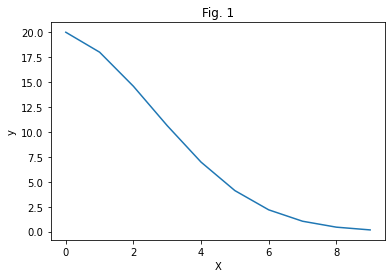

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(data_x[0], data_y[0])
plt.xlabel('X')
plt.ylabel('y')
plt.title('Fig. 1')
plt.show()

# Conditionals
Conditional statements allow you to check if the conditions of a statement are met (For e.g. the condition (vector_length == 1) will return True if the length of a vector is equal to 1, and return False if the length is not 1). Conditional statements in python support all of the various relational operators:

equals: ==

greater than: >

lesser than: <

greater than or equal to: >=

lesser than or equal to: <=

They can be combined with each other using 3 logical operators, 'and', 'or', 'not', that can be written in plain english, so no memorization required! 

Below, we use these to evaluate some sample conditions.

In [35]:
print(2 > 1)
print(1 < 2 and 2 < 3 and not (5 > 6)) # and is true only when all individual conditions are true
print(1 < 0 or 1 > -1) # or just needs one condition to be true for the whole statement to be true

True
True
True


In [36]:
# Python, unlike many other programming languages allows for testing whether consecutive variables
#are non-decreasing

d,e,f,g,h,i = 2,2,3,4,5,5
print(d <= e <= f <= g <= h <= i)

True


Conditional statements only evaluate whether something is true or not. The "if-else" command allows us to execute certain actions if a conditional statement is true, and if not, execute an alternative statement. The syntax is illustrated below.

```
if <condition>:
	<do something>
elif <another condition>:
	<do something else>
else:
	<what to do if all conditions failed>
```

In [40]:
# Code to check if a number is positive, negative or zero
x = -5

if (x > 0):
	print("{} is positive".format(x))

elif (x < 0):
	print("{} is negative".format(x))

else:
	print("{} is zero".format(x))


-5 is negative


Let's try it! Write a piece of code to "flip a coin". Display "heads" or "tails" depending on the result. Assume that the coin is fair, that is, the probability of a heads or a tails is 50%. 
Hint: You can use a random number generator to draw random numbers from a uniform distribution (google "Python uniform random generation" will help you find a suitable function) and assign 50% of the possible numbers to heads and the other 50% to tails.

In [ ]:
# importing random library for whatever random number generator you'll use.
import random

# YOUR CODE HERE

## Loops

Iteration is an extremely valuable computational tool! It is the repetition of an action until a condition is met. In Matlab, the two main forms of iteration are "for" loops and "while" loops. The main difference between the two types of loops is that "for" loops repeat actions a set number of times, whereas "while" loops iterate until a condition is met.


In [ ]:
#For e.g.
v1 = np.linspace(1,50,num=10);
numIterations = 10;
for index in range(numIterations): #loop over these values
    # the variable you loop over will often be a list of sequential 
    # integers, as this makes indexing convenient
    print(v1[index])


In [ ]:
#While e.g.
index = 0;
while index < 10: #conditional checking if the program should exit the loop
    print(v1[index]) #action to be taken
    index += 1; # you have to change the value referenced in the conditional
    # in the body of the loop or the while loop will run infinitely.  

Let's try out loops! Write (a) a for loop to flip a coin 100 times and report the proportion that are heads and (b) a while loop to flip a coin until you have 50 heads, and report the proportion that are heads. 
Hint: For the for loop, create a variable to act as a counter for the number of head flips. For the while loop, since you are iterating until a specific number of heads are acheived, keep track of the number of the flips to get to 50 heads instead.

In [ ]:
# YOUR CODE HERE 

Tips: Python 3.7 provides a few tools to visualize what your code is doing, which is especially useful for debugging and visualizing loops. You can add a break point with the fucntion breakpoint() that will pause the execution of code (so you can check what is happening with your calculation). You can then use 
c: continue execution
n : step to the next line within the same function
q: quit the debugger/execution

In [ ]:
#For e.g.
for ii in range(numIterations):
    print(ii)
    breakpoint()
    print(ii)

The commands 'break' and 'continue' can also be used to prematurely stop loops, or to skip certain iterations, for e.g.:

In [ ]:
numIterations = 10
for ii in range(numIterations):
    if (ii%2==0): #if ii is divisible by 2
        continue #skip to the next value
    print(ii)

You can also nest loops inside each other. Nested loops run fully on each iteration of the outside loop.

In [ ]:
#For e.g.
for ii in range(numIterations): #loop runs 10 times
    for jj in range(numIterations): #this will run 10 X 10 times
        #code
       

## Functions!
Functions are used to 'package' a piece of code so that you can easily reproduce it. They are defined by specifying a set of input variables, a set of output variables, and a function name. In Python, the syntax for this is as follows:

def FunctionName(inputVars):
    # function body
    return output
    
Let's make a function!
Write a function to translate your "coin flip" loop into a function coinFlip that takes as input two values, nFlips and nTrials. nFlips is the number of flips of a coin to be made, repeating the process nTrials times. Have the function output a vector, pHeads, which contains the probability of getting a head calculated over each trial (Hint: the sum of the flips matrix divided by the length)

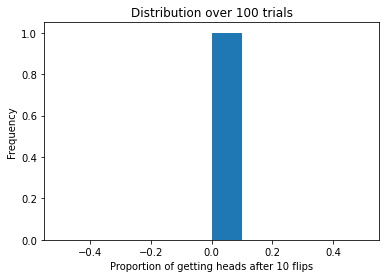

In [42]:
# YOUR CODE HERE!
nFlips = 10
N = 100

# And plot your results!
plt.figure;
plt.hist(pHeads)
plt.xlabel(f'Proportion of getting heads after {nFlips} flips')
plt.title(f'Distribution over {N} trials')
plt.ylabel('Frequency')
plt.show()

Like Matlab, you can write anonymous functions in Python as well.  Anonymous functions or lambda functions perform simple operations on one or more variables, and can be defined with the lambda keyword instead of the def keyword:


In [ ]:
#Example of a anonymous function
square = lambda x: x**2 
print(square(5))

## Speeding up your code

Loops are very useful, and are often helpful for getting a conceptual understanding of a problem at hand (i.e. they can be used to sketch something out). But they are often inefficient. The more efficient (faster) thing to use, when possible, is matrix and vector operations. Let's go over a very simple example.

Let's return to the data we loaded up before:

In [46]:
print(f'X values in dataset: {data_x}')
print(f'Y values in dataset: {data_y}')

X values in dataset: [[0 1 2 3 4 5 6 7 8 9]]
Y values in dataset: [[20.         18.         14.58       10.62882     6.9735688   4.11782264
   2.18837978  1.04669527  0.45056799  0.17455927]]


This is a simulated dataset which we created with "temporal discounting" in mind. Temporal discounting is the neuroeconomic phenomenon by which things seem less valuable to us the longer we have to wait to receive them. Most people would prefer to be given $20 today than in 2 weeks. You can model this by simulating an arbitrary decay function, using a "gamma" discounting parameter. First, let's simulate it using a loop.


9
The loop took 0.00011754035949707031 seconds to run.


Text(0, 0.5, 'Perceived value')

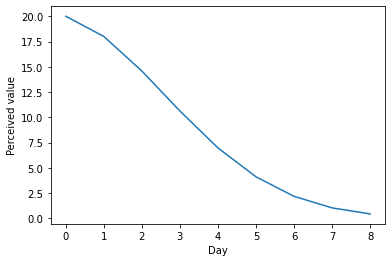

In [98]:
# Since we're going to measure how long these processes take to run, 
# relative to each other, let's import the proper package.
import time

# As in the original dataset, let's simulate 10 days of decay.
n_days = 10

# Because x is our x-axis, which is just time, creating x is as simple as
# creating a vector of increasing integers with start point 0 and end point
# 9. (To make our simulations simple, the first day is going to be called Day 0.)
data_x = np.arange(0,9)
# The code below is written flexibly, so if you want to simulate a longer time 
# horizon here, then just extend data_x!
print(np.size(data_x))

# We're going to repopulate data_y, so for now, let's re-initialize it so
# it's just an empty variable.
data_y = np.empty(np.size(data_x))
data_y[:] = np.nan

# Set the discounting parameter, gamma:
gamma = 0.9
# If you'd like to, you can play with this parameter, keeping it between 0
# and 1 (exclusive). Higher values of gamma will result in less temporal
# discounting.

# Set the initial value of the offer on day 0:
value = 20

# Here is a loop which simulates temporal discounting over n_days days.
# The formula for temporal discounting is an exponential:
# value(t+1) = value(t) .* gamma^(t+1)
start = time.time()
for day in data_x:
    # decrement the value by multiplying it by gamma^t
    value = value * (gamma ** day)
    data_y[day] = value

    
end = time.time()
print(f'The loop took {end - start} seconds to run.')

# Now plot your result to ensure it looks correct!
plt.figure
plt.plot(data_x,data_y)
plt.xlabel('Day')
plt.ylabel('Perceived value')

Okay, now go ahead and try doing the same thing but WITHOUT using a loop!

The non-looping code took 4.887580871582031e-05 seconds to run.


Text(0, 0.5, 'Perceived value')

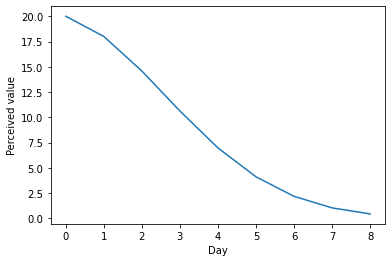

In [103]:
start = time.time()

# YOUR NON-LOOPING CODE HERE #

end = time.time()
print(f'The non-looping code took {end - start} seconds to run.')

# And plot!
plt.figure
plt.plot(data_x,data_y)
plt.xlabel('Day')
plt.ylabel('Perceived value')

## Exercises:
### Exercise 1: Projections, change of coordinates, and angles.
(a)  Write a function, "project" that takes two non-zero vectors, v and unit vector u as input and projects v onto u. Have the function output the length of the projection. Test the function with two randomly generated vectors. Remember to use numpy functions to define vectors, not lists!

(b) Write a function, "changeOfCoords" that takes two vectors, v and u as input. Create a new "coordinate space" such that the vector u is one of the axes, and re-write the coordinates of v in the "coordinate space" of u. Have your function return the x and y coordinates of v in the coordinate system based off u.
Hint: To create a new coordinate space, convert u to a unit vector and find its orthogonal vector, w.

(c)Write a function, "angleBetween" that takes two vectors, v and u, and calculates the angle between them. Hint: The inverse cosine function np.arccos() will help.

### Exercise 2: Plotting a unit circle
A unit circle is a circle of radius 1, centered on the origin. When we get into matrix transformations, circles are often a nice way to visualize how a space can be transformed by a matrix. Let's think about how to create the unit circle. 
HINT: Use trigonometry! 

In [108]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# YOUR CODE HERE!

# And plot!
plt.plot(vectors[0][0][:],vectors[1][0][:]);
plt.title('Unit circle')

# Your plot should look like a perfect circle. If it doesn't, then try
# making sure your x and y axes are of the same length.

# P.S. Plot can be a slightly wonky/strange function to use. Try
# understanding why the above plot command plots the unit circle. Play
# around with giving plot different X/Y coordinates, and then giving it a
# vector to plot which originates at the origin.

NameError: name 'plt' is not defined

### Exercise 3: Vectors as operators
Imagine there is a neuron with three dendrites. Each dendrite receives the same 8 inputs (has 8 synaptic terminals), but uses a different computation on those inputs to determine whether it should signal the cell to fire. Dendrite 1 acts as a simple averager. Dendrite 2 acts as windowed averager, only factoring in the last four inputs, Dendrite 3 acts as a component selector and only extracts the value of the last (eighth) dimension. The cell decides to fire is a majority of the dendrites surpass a threshold.
Create a function neuron() which takes a 8x1 input vector and a scalar threshold, and outputs the cell's decision to fire as a boolean value (0=no firing, 1 = firing). Randomly generate an input vector and test your function using an appropriate threshold value.

In [4]:
def neuron(current, threshold):
    #YOUR CODE STARTS HERE
    s = len(current)
    #dendrite1 =  #replace this with an averager
    #dendrite2 =  #replace this with a windowed averager
    #dendrite3 =  #replace this with a component selector
    
    #Try to represent the action of the dendrite vectors on the input
    #vector as a vector x matrix multiplication problem
   

    #YOUR CODE STARTS HERE

    
    #Compare the response to the input threshold value and return the
    #appropriate output

    return output

In [ ]:
#test the neuron function

Now imagine that instead of those 8 inputs representing different synaptic terminals, they represent inputs over time. Write a function neuronOverTime, that takes as an input a threshold and a scalar T, a length of time. Randomly generate a vector of inputs with the length T, and use the 'neuron' function to generate the cell's response at each successive time point by calculating the reponse to subset of inputs, input(t:t+8). To measure the activity of the neuron at time t = 1, pad the input vector with zeros so that the first random number is input 8. Create a vector of output values (1s and 0s) and plot them as a "spike plot" using the function stem().